## Attempt 2 Project 2

In [644]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
from numbers import Number

%matplotlib inline

In [645]:
df = pd.read_csv('..//project-2//datasets//train.csv')

In [646]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [647]:
df.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [648]:
#Column names to lowercase and no spaces
df.rename(columns= lambda x: x.replace(' ', '_'), inplace=True)
df.columns = df.columns.str.lower()
len(df.columns)

81

In [649]:
#Checking for nulls/Nans
#Return Columns with NaN values
df.isnull().sum()[df.isnull().sum() != 0]

lot_frontage       330
alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

In [650]:
# Data Cleaning of columns based on Documentation
#    If the column was a catergorial/string, we gave flags 1 for non-nan values.
#    If the column was continous and a value of 0 was justifiable (such as not having a basement), NaNs were replaced with 0.
#Arguably, we may not want to add nobasement data to basement data, however for larger correlative analysis it will provide a
#greater aggregate view.
#    If the column had documentatation which explained NA values, it was addressed accordingly.

In [651]:
# Lots Frontage -> Putting 0. Since none exists in data it would be justifiable to put 0.
df['lot_frontage'] = [x if x >= 0 else 0 for x in df.lot_frontage] 
df.lot_frontage.value_counts()

0.0      330
60.0     179
70.0      96
80.0      94
50.0      90
65.0      71
75.0      68
85.0      52
63.0      38
24.0      33
78.0      33
21.0      32
64.0      31
74.0      31
90.0      31
72.0      30
68.0      28
62.0      28
73.0      25
100.0     23
82.0      21
43.0      20
57.0      20
52.0      20
79.0      19
66.0      19
53.0      18
59.0      18
67.0      18
88.0      16
        ... 
140.0      2
130.0      2
46.0       2
101.0      2
113.0      2
121.0      1
174.0      1
115.0      1
33.0       1
141.0      1
195.0      1
122.0      1
117.0      1
150.0      1
138.0      1
153.0      1
119.0      1
155.0      1
111.0      1
22.0       1
118.0      1
124.0      1
160.0      1
144.0      1
25.0       1
200.0      1
116.0      1
137.0      1
123.0      1
135.0      1
Name: lot_frontage, Length: 119, dtype: int64

In [652]:
#Alley NaN -> FillNA with NoAlley (No Alley)
df.alley.fillna('Noalley', inplace =True)

In [653]:
#Masonary area - > FillNA with 0 (Rows with NA veneer are same as area. Imply No Veener == 0 area)
df['mas_vnr_area'].fillna('0', inplace =True)

In [654]:
#Basement Qualtiy -> FillNA with Nobase (No Basement)
df['bsmt_qual'] = [x if x == str(x) else 'Nobase' for x in df.bsmt_qual]
df.bsmt_qual.value_counts()

TA        887
Gd        864
Ex        184
Fa         60
Nobase     55
Po          1
Name: bsmt_qual, dtype: int64

In [655]:
#Basement Condition - > FillNA with Nobase (No Basement)
df['bsmt_cond'] = [x if x == str(x) else 'Nobase' for x in df.bsmt_cond]
df.bsmt_cond.value_counts()

TA        1834
Gd          89
Fa          65
Nobase      55
Po           5
Ex           3
Name: bsmt_cond, dtype: int64

In [656]:
#Basement Exposure - > FillNA with Nobase (No Basement)
df['bsmt_exposure'] = [x if x == str(x) else 'Nobase' for x in df.bsmt_exposure]
df.bsmt_exposure.value_counts()

No        1339
Av         288
Gd         203
Mn         163
Nobase      58
Name: bsmt_exposure, dtype: int64

In [657]:
#Basement Type 1 - > FillNA with Nobase (No Basement)
df['bsmtfin_type_1'] = [x if x == str(x) else 'Nobase' for x in df.bsmtfin_type_1]
df.bsmtfin_type_1.value_counts()

GLQ       615
Unf       603
ALQ       293
BLQ       200
Rec       183
LwQ       102
Nobase     55
Name: bsmtfin_type_1, dtype: int64

In [658]:
#Basement Type 1 - > FillNA with Nobase (No Basement)
df['bsmtfin_type_1'] = [x if x == str(x) else 'Nobase' for x in df.bsmtfin_type_1]
df.bsmtfin_type_1.value_counts()

GLQ       615
Unf       603
ALQ       293
BLQ       200
Rec       183
LwQ       102
Nobase     55
Name: bsmtfin_type_1, dtype: int64

In [659]:
#Basement type1 finished sqft - > FillNA with 0 (Checked out and says No Basement)
df[df.bsmtfin_sf_1.isnull() == True]['bsmtfin_type_1']
df['bsmtfin_sf_1'].fillna('0', inplace =True)
df.bsmtfin_sf_1.isnull().sum()

0

In [660]:
#Basement Type 2 - > FillNA with Nobase (No Basement)
df['bsmtfin_type_2'] = [x if x == str(x) else 'Nobase' for x in df.bsmtfin_type_2]
df.bsmtfin_type_2.value_counts()

Unf       1749
Rec         80
LwQ         60
Nobase      56
BLQ         48
ALQ         35
GLQ         23
Name: bsmtfin_type_2, dtype: int64

In [661]:
#Basement type2 finished sqft - > FillNA with 0 (Checked out and says  No Basement)
df[df.bsmtfin_sf_2.isnull() == True]['bsmtfin_type_2']
df['bsmtfin_sf_2'].fillna('0', inplace =True)
df.bsmtfin_sf_1.isnull().sum()

0

In [662]:
#Basement unfinished sqft - > FillNA with 0 (Checked out and says No Basement)
df[df.bsmt_unf_sf.isnull() == True]['bsmt_qual']
df['bsmt_unf_sf'].fillna('0', inplace =True)
df.bsmt_unf_sf.isnull().sum()

0

In [663]:
#Total Basement Sq.Ft - > FillNA with 0 (Checked out and says No Basement)
df[df.total_bsmt_sf.isnull() == True]['total_bsmt_sf']
df['total_bsmt_sf'].fillna('0', inplace =True)
df.total_bsmt_sf.isnull().sum()

0

In [664]:
#Basement Full bath discrete - Flag
df['bsmt_full_bath_flag'] = [1 if x >= 0 else 0 for x in df['bsmt_full_bath']]
df.bsmt_full_bath_flag.value_counts()

1    2049
0       2
Name: bsmt_full_bath_flag, dtype: int64

In [665]:
#Basement half bath discrete - Flag
df['bsmt_half_bath_flag'] = [1 if x >= 0 else 0 for x in df['bsmt_half_bath']]
df.bsmt_half_bath_flag.value_counts()

1    2049
0       2
Name: bsmt_half_bath_flag, dtype: int64

In [666]:
#Fireplace Quality - > FillNA with Nofp (No Fireplace)
df['fireplace_qu'] = [x if x == str(x) else 'Nofp' for x in df.fireplace_qu]
df.fireplace_qu.value_counts()

Nofp    1000
Gd       523
TA       407
Fa        59
Po        31
Ex        31
Name: fireplace_qu, dtype: int64

In [667]:
#Garage Type -> Fillna Nog(No garage)
df.garage_type.fillna('Nog', inplace = True)
df.garage_type.value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Nog         113
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [668]:
#Garage year built - > Drop
df.drop(['garage_yr_blt'], inplace=True, axis=1)

In [669]:
#Garage finish - > FillNA Nog (No garage)
df.garage_finish.fillna('Nog', inplace=True)
df.garage_finish.value_counts()

Unf    849
RFn    579
Fin    509
Nog    114
Name: garage_finish, dtype: int64

In [670]:
# Number of cars garage can fit -> FillNA 
df.garage_cars.fillna(0, inplace =True)
df.garage_cars.value_counts()

2.0    1136
1.0     524
3.0     263
0.0     114
4.0      13
5.0       1
Name: garage_cars, dtype: int64

In [671]:
# Size of garage -> FillNA
df.garage_area.fillna(0, inplace=True)
df.garage_area.isnull().sum()

0

In [672]:
#Garage Quality - > FillNA Nog (No garage)
df.garage_qual.fillna('Nog', inplace=True)
df.garage_qual.isnull().sum()

0

In [673]:
#Garage Condition -> FillNa Nog (No Garage)
df.garage_cond.fillna('Nog', inplace=True)
df.garage_cond.value_counts()

TA     1868
Nog     114
Fa       47
Gd       12
Po        8
Ex        2
Name: garage_cond, dtype: int64

In [674]:
#Pool Quality -> Fillna NP (No Pool)
df.pool_qc.fillna('NP', inplace=True)
df.pool_qc.value_counts()

NP    2042
Gd       4
Fa       2
TA       2
Ex       1
Name: pool_qc, dtype: int64

In [675]:
#Fence -> FillNA NF (No Fence)
df.fence.fillna('NF', inplace=True)
df.fence.value_counts()

NF       1651
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: fence, dtype: int64

In [676]:
#misc_feature - > Drop column from data. Will not quantify for this challenge 
df.drop(['misc_feature'], inplace=True, axis=1)

In [677]:
#Returns a list of still exisiting NAs that are flagged
df.isnull().sum()[df.isnull().sum() != 0]

mas_vnr_type      22
bsmt_full_bath     2
bsmt_half_bath     2
dtype: int64

In [678]:
df.dropna(inplace=True, axis=0)

In [679]:
#Returns a list of still exisiting NAs that are flagged
df.isnull().sum()[df.isnull().sum() != 0]

Series([], dtype: int64)

In [680]:
#Fixing data types seen by dummy set 
df.mas_vnr_area = [int(x) for x in df.mas_vnr_area]
df.bsmtfin_sf_1 = [int(x) for x in df.bsmtfin_sf_1]
df.bsmtfin_sf_2 = [int(x) for x in df.bsmtfin_sf_2]
df.bsmt_unf_sf = [int(x) for x in df.bsmt_unf_sf]
df.total_bsmt_sf = [int(x) for x in df.total_bsmt_sf]

In [681]:
# Getting dummies for catergorial values 
dummylist=[]
for x in range(0, len(df.columns)):
    if df.dtypes[x] == object:
        dummylist.append(df.columns[x])

In [682]:
df = pd.get_dummies(df, columns= dummylist, drop_first=True)
df.head().T

,0,1,2,3,4
id,109.0,544.0,153.0,318.0,255.0
pid,533352170.0,531379050.0,535304180.0,916386060.0,906425045.0
ms_subclass,60.0,60.0,20.0,60.0,50.0
lot_frontage,0.0,43.0,68.0,73.0,82.0
lot_area,13517.0,11492.0,7922.0,9802.0,14235.0
overall_qual,6.0,7.0,5.0,5.0,6.0
overall_cond,8.0,5.0,7.0,5.0,8.0
year_built,1976.0,1996.0,1953.0,2006.0,1900.0
year_remod/add,2005.0,1997.0,2007.0,2007.0,1993.0
mas_vnr_area,289.0,132.0,0.0,0.0,0.0


In [683]:
#Setting X and y for visualization 
features = df.columns
X = df[features]
y = df['saleprice']

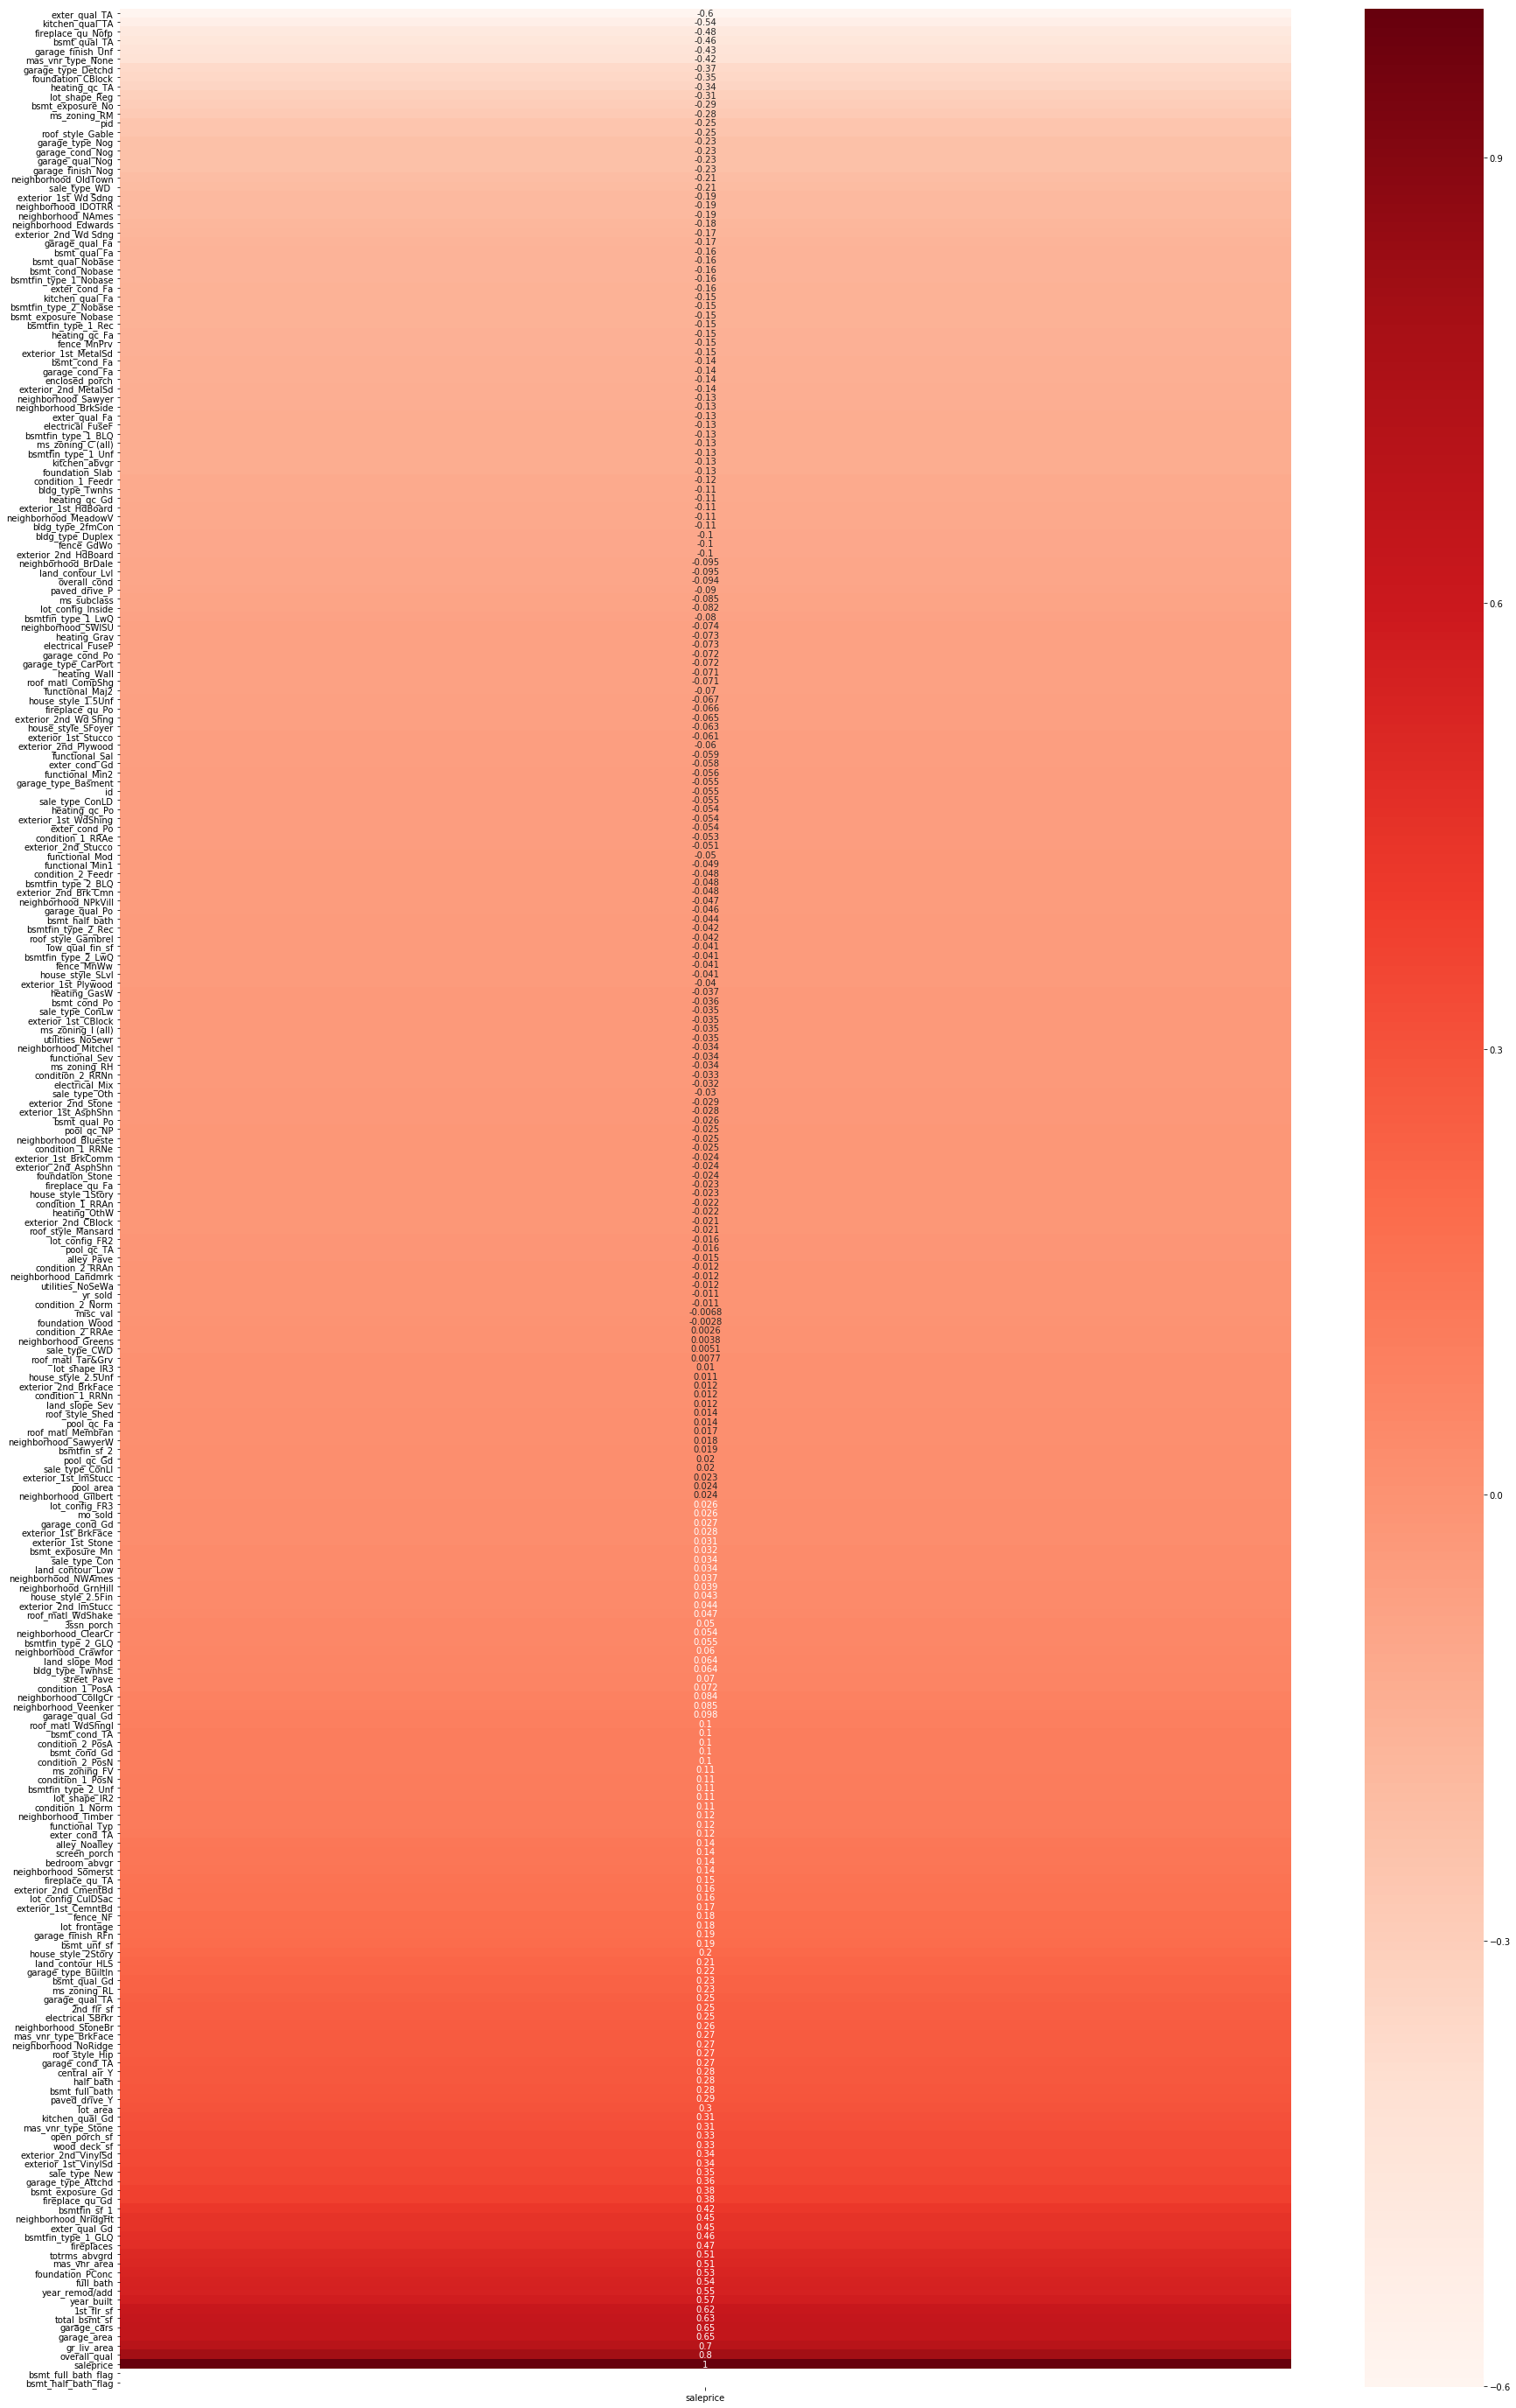

In [684]:
plt.figure(figsize=(30,50))
sns.heatmap(df[features].corr()[['saleprice']].sort_values('saleprice'), cmap='Reds', annot=True)

In [784]:
#New Feature list based on correlation. Those greater than .5 to saleprice
features = [x for x in df.columns if (abs(df[x].corr(df['saleprice'])) >= .32)]
features.remove('saleprice')
features.remove('fireplace_qu_Nofp')
features.remove('mas_vnr_area')
X = df[features]
y = df['saleprice']


In [785]:
features

['overall_qual',
 'year_built',
 'year_remod/add',
 'bsmtfin_sf_1',
 'total_bsmt_sf',
 '1st_flr_sf',
 'gr_liv_area',
 'full_bath',
 'totrms_abvgrd',
 'fireplaces',
 'garage_cars',
 'garage_area',
 'wood_deck_sf',
 'open_porch_sf',
 'neighborhood_NridgHt',
 'exterior_1st_VinylSd',
 'exterior_2nd_VinylSd',
 'mas_vnr_type_None',
 'exter_qual_Gd',
 'exter_qual_TA',
 'foundation_CBlock',
 'foundation_PConc',
 'bsmt_qual_TA',
 'bsmt_exposure_Gd',
 'bsmtfin_type_1_GLQ',
 'heating_qc_TA',
 'kitchen_qual_TA',
 'fireplace_qu_Gd',
 'garage_type_Attchd',
 'garage_type_Detchd',
 'garage_finish_Unf',
 'sale_type_New']

In [786]:
dft = pd.read_csv('..//project-2//datasets//test.csv')

In [787]:
#Column names to lowercase and no spaces
dft.rename(columns= lambda x: x.replace(' ', '_'), inplace=True)
dft.columns = dft.columns.str.lower()


In [788]:
dft = pd.get_dummies(dft, columns= dummylist, drop_first=True)

In [789]:
dft.isnull().sum()[dft.isnull().sum() != 0]

lot_frontage     160
mas_vnr_area       1
garage_yr_blt     45
misc_feature     838
dtype: int64

In [790]:
dft[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 32 columns):
overall_qual            879 non-null int64
year_built              879 non-null int64
year_remod/add          879 non-null int64
bsmtfin_sf_1            879 non-null int64
total_bsmt_sf           879 non-null int64
1st_flr_sf              879 non-null int64
gr_liv_area             879 non-null int64
full_bath               879 non-null int64
totrms_abvgrd           879 non-null int64
fireplaces              879 non-null int64
garage_cars             879 non-null int64
garage_area             879 non-null int64
wood_deck_sf            879 non-null int64
open_porch_sf           879 non-null int64
neighborhood_NridgHt    879 non-null uint8
exterior_1st_VinylSd    879 non-null uint8
exterior_2nd_VinylSd    879 non-null uint8
mas_vnr_type_None       879 non-null uint8
exter_qual_Gd           879 non-null uint8
exter_qual_TA           879 non-null uint8
foundation_CBlock       879 non-nul

In [791]:
#Fixing data types seen by dummy set 
dft.bsmtfin_sf_1 = [int(x) for x in dft.bsmtfin_sf_1]
dft.bsmtfin_sf_2 = [int(x) for x in dft.bsmtfin_sf_2]
dft.bsmt_unf_sf = [int(x) for x in dft.bsmt_unf_sf]
dft.total_bsmt_sf = [int(x) for x in dft.total_bsmt_sf]

In [792]:
Xt = dft[features]

In [793]:
dft[features].isnull().sum()

overall_qual            0
year_built              0
year_remod/add          0
bsmtfin_sf_1            0
total_bsmt_sf           0
1st_flr_sf              0
gr_liv_area             0
full_bath               0
totrms_abvgrd           0
fireplaces              0
garage_cars             0
garage_area             0
wood_deck_sf            0
open_porch_sf           0
neighborhood_NridgHt    0
exterior_1st_VinylSd    0
exterior_2nd_VinylSd    0
mas_vnr_type_None       0
exter_qual_Gd           0
exter_qual_TA           0
foundation_CBlock       0
foundation_PConc        0
bsmt_qual_TA            0
bsmt_exposure_Gd        0
bsmtfin_type_1_GLQ      0
heating_qc_TA           0
kitchen_qual_TA         0
fireplace_qu_Gd         0
garage_type_Attchd      0
garage_type_Detchd      0
garage_finish_Unf       0
sale_type_New           0
dtype: int64

In [794]:
Xt.isnull().sum()

overall_qual            0
year_built              0
year_remod/add          0
bsmtfin_sf_1            0
total_bsmt_sf           0
1st_flr_sf              0
gr_liv_area             0
full_bath               0
totrms_abvgrd           0
fireplaces              0
garage_cars             0
garage_area             0
wood_deck_sf            0
open_porch_sf           0
neighborhood_NridgHt    0
exterior_1st_VinylSd    0
exterior_2nd_VinylSd    0
mas_vnr_type_None       0
exter_qual_Gd           0
exter_qual_TA           0
foundation_CBlock       0
foundation_PConc        0
bsmt_qual_TA            0
bsmt_exposure_Gd        0
bsmtfin_type_1_GLQ      0
heating_qc_TA           0
kitchen_qual_TA         0
fireplace_qu_Gd         0
garage_type_Attchd      0
garage_type_Detchd      0
garage_finish_Unf       0
sale_type_New           0
dtype: int64

In [795]:
X = np.asanyarray(X)
Xt= np.asanyarray(Xt)

In [796]:
X.shape

(2027, 32)

In [797]:
Xt.shape

(879, 32)

In [798]:
#Standard Scaling
ss = StandardScaler()
ss.fit(X)
X_train = ss.transform(X)
X_test = ss.transform(Xt)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [799]:
lr = LinearRegression()
lr.fit(X_train, y)
lrpred = lr.predict(X_test)
lrdata = pd.DataFrame(lrpred)

In [800]:
lrdata.columns = ['SalePrice']
lrdata.head()
indexid = pd.DataFrame(dft.id)
Sub = pd.merge(lrdata, indexid, left_index=True, right_index=True)
Sub = pd.DataFrame(Sub)
Sub = Sub[['id', 'SalePrice']]
Sub.columns = ['Id', 'SalePrice']